This Python notebook presents a comprehensive analysis of the impact of implementing a digital twin in a pet food manufacturing process. It compares the performance metrics before and after the implementation, focusing on moisture deviation data collected over specified timeframes. The analysis utilizes histograms to visualize the distribution of moisture deviations, highlighting the percentage of samples that fall below a defined threshold. Descriptive statistics are provided to summarize the data, revealing insights into the effectiveness of the digital twin in improving adherence to quality standards. Overall, the findings demonstrate a significant enhancement in process control and product quality post-implementation.

### Retrieve data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
data = pd.read_excel('moisture_data_joel.xlsx')

# Create identifier for runs
data['RunID'] = (data['Descripcion'] != data['Descripcion'].shift(1)).cumsum()

In [9]:
line_1_data = data[(data['Fecha.1'] < "2023/12/31") ]
line_1_data.shape

(19670, 15)

In [10]:
data[['Fecha','Fecha.1','Obj_Hum_Recub','Humedad_TBalanza', 'Hum_Dev']][data['RunID'] == 10]

,Fecha,Fecha.1,Obj_Hum_Recub,Humedad_TBalanza,Hum_Dev
53,2023-01-05 04:45:28.157,2023-01-05 06:01:50,9.2,10.0,0.8
54,2023-01-05 04:45:28.157,2023-01-05 06:49:00,9.2,9.8,0.6
55,2023-01-05 07:31:36.917,2023-01-05 07:49:18,9.2,9.7,0.5
56,2023-01-05 07:31:36.917,2023-01-05 08:57:00,9.2,9.8,0.6
57,2023-01-05 07:31:36.917,2023-01-05 09:47:42,9.2,9.6,0.4
58,2023-01-05 07:31:36.917,2023-01-05 10:39:26,9.2,8.8,-0.4


### Performance without Digital Twin

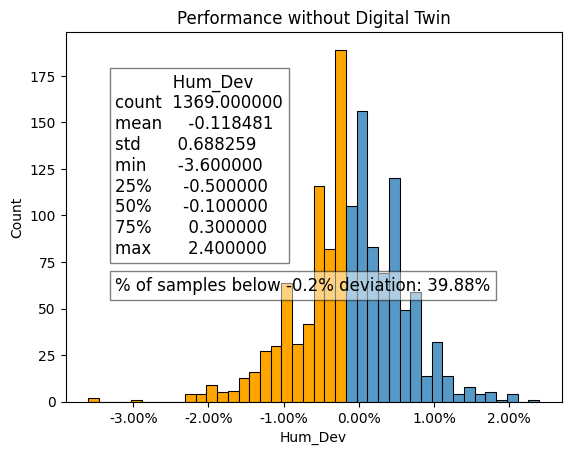

In [11]:
# Defining a adherence threshold
filtered_data = data[(data['Fecha.1']>= "2025/07/01")]

target_samples = len(filtered_data['Hum_Dev'][filtered_data['Hum_Dev']<-0.2])
total_samples = filtered_data['Hum_Dev'].count()
ratio_below = target_samples / total_samples * 100
stats = filtered_data[['Hum_Dev']].describe()

# Create a histogram of the 'Hum_Dev' data
ax = sns.histplot(data=filtered_data['Hum_Dev'], stat='count')

# Highlight bins in the histogram where the center is less than -0.2
for patch in ax.patches:
    bin_center = patch.get_x() + patch.get_width() / 2
    if bin_center < -0.2:
        patch.set_facecolor('orange')  # Set the color to orange for these bins

# Get the current limits of the x and y axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Calculate the x position for the text boxes, 10% to the right of the x-axis limit
text_x = xlim[1] - 0.9 * (xlim[1] - xlim[0])

# Calculate y positions for the text boxes, at 50% and 60% of the y-axis limit
text_y1 = ylim[1] * 0.3
text_y2 = ylim[1] * 0.4

# Add a text box with the percentage of samples below -0.2% deviation
plt.text(x=text_x, y=text_y1, s=f'% of samples below -0.2% deviation: {ratio_below:.2f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a text box with descriptive statistics
plt.text(x=text_x, y=text_y2, s=stats.to_string(), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set the title of the plot
plt.title("Performance without Digital Twin")

# Format the x-axis labels to show two decimal places
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Define a function to format the x-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x:.2f}%'

# Apply the percentage formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Display the plot
plt.show()

### Performance with Digital Twin

In [12]:
data = pd.read_excel('moisture_data_joel.xlsx')

# Create identifier for runs
data['RunID'] = (data['Id_Material'] != data['Id_Material'].shift(1)).cumsum()

data_after_TT = data.copy()
data_after_TT = data[data['Fecha.1'] >= "2024/09/01"]
data_after_TT['Timestamp'] = data_after_TT['Fecha.1']

C:\Users\YX436MP\AppData\Local\Temp\ipykernel_24764\2753285537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_TT['Timestamp'] = data_after_TT['Fecha.1']


In [13]:
adherence_data = pd.read_excel('adherence_data.xlsx')
adherence_data['Timestamp'] = adherence_data['KibbleIDChange']

In [14]:
combined_df = pd.concat([data_after_TT, adherence_data], ignore_index=True)
combined_df = combined_df.sort_values(by="Timestamp").reset_index(drop=True)

combined_df['AdhZ1'] = combined_df['AdhZ1'].fillna(method='ffill')
combined_df['AdhZ2'] = combined_df['AdhZ2'].fillna(method='ffill')

kibble_list = [2333, 2332, 2331, 2339, 2335, 2338, 2336, 5584, 5583, 2199, 894]

combined_df = combined_df[combined_df['Id_Material'].isin(kibble_list)]

combined_df['Id_Material'].unique()

C:\Users\YX436MP\AppData\Local\Temp\ipykernel_24764\322041524.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['AdhZ1'] = combined_df['AdhZ1'].fillna(method='ffill')
C:\Users\YX436MP\AppData\Local\Temp\ipykernel_24764\322041524.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df['AdhZ2'] = combined_df['AdhZ2'].fillna(method='ffill')


array([2331., 2332.,  894., 2338., 2336., 2339., 5583., 2335., 2199.,
       5584., 2333.])

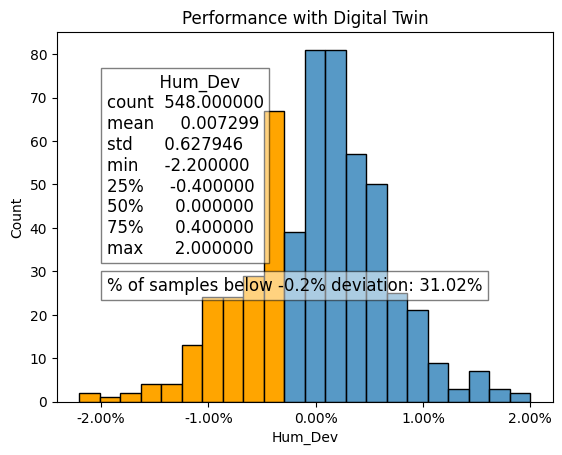

In [15]:
# Defining a adherence threshold
filtered_data = combined_df[(combined_df['Timestamp'] >= "2025/07/01") & 
                            (combined_df['AdhZ1'] >= 0.95) & 
                            (combined_df['AdhZ2'] >= 0.95)]

target_samples = len(filtered_data['Hum_Dev'][filtered_data['Hum_Dev']<-0.2])
total_samples = filtered_data['Hum_Dev'].count()
ratio_below = target_samples / total_samples * 100
stats = filtered_data[['Hum_Dev']].describe()

# Create a histogram of the 'Hum_Dev' data
ax = sns.histplot(data=filtered_data['Hum_Dev'], stat='count')

# Highlight bins in the histogram where the center is less than -0.2
for patch in ax.patches:
    bin_center = patch.get_x() + patch.get_width() / 2
    if bin_center < -0.2:
        patch.set_facecolor('orange')  # Set the color to orange for these bins

# Get the current limits of the x and y axes
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Calculate the x position for the text boxes, 10% to the right of the x-axis limit
text_x = xlim[1] - 0.9 * (xlim[1] - xlim[0])

# Calculate y positions for the text boxes, at 50% and 60% of the y-axis limit
text_y1 = ylim[1] * 0.3
text_y2 = ylim[1] * 0.4

# Add a text box with the percentage of samples below -0.2% deviation
plt.text(x=text_x, y=text_y1, s=f'% of samples below -0.2% deviation: {ratio_below:.2f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add a text box with descriptive statistics
plt.text(x=text_x, y=text_y2, s=stats.to_string(), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Set the title of the plot
plt.title("Performance with Digital Twin")

# Format the x-axis labels to show two decimal places
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Define a function to format the x-axis labels as percentages
def percentage_formatter(x, pos):
    return f'{x:.2f}%'

# Apply the percentage formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Display the plot
plt.show()